# Transfer Learning using Resnet50

## Splitting the dataset folder

In [1]:
pip install split_folders

Note: you may need to restart the kernel to use updated packages.


In [1]:
import splitfolders

In [5]:
input_folder="E:\Deep Learning\Flower Recognization/flowers"
output="E:\Deep Learning\Flower Recognization/processed_data"
splitfolders.ratio(input_folder,output,seed=55,ratio=(.6,.2,.2))

In [17]:
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [18]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [19]:
train_path = 'E:\Deep Learning\Flower Recognization/processed_data/train'
valid_path = 'E:\Deep Learning\Flower Recognization/processed_data/test'

## Adding the pre trained model

In [20]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [21]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [22]:
 # useful for getting number of classes
folders = glob('E:\Deep Learning\Flower Recognization/processed_data/train/*')
len(folders)

5

In [25]:
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

**Visualizing model summary**

In [26]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 40,410,949 (154.16 MB)

 Trainable params: 25,696,261 (98.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## resizing the image and applying normalization to image size i.r ./255 each pixel

In [29]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2588 images belonging to 5 classes.
Found 869 images belonging to 5 classes.


In [37]:
# Check a batch from training_set
for x_batch, y_batch in training_set:
    print(x_batch.shape, y_batch.shape)
    break

# Check a batch from test_set
for x_val_batch, y_val_batch in test_set:
    print(x_val_batch.shape, y_val_batch.shape)
    break


(32, 224, 224, 3) (32, 5)
(32, 224, 224, 3) (32, 5)


In [38]:
op = model.fit(
  training_set,
  epochs=5,
  validation_data=test_set
)


Epoch 1/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.8561 - loss: 0.3798 - val_accuracy: 0.8159 - val_loss: 0.5180
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.8930 - loss: 0.3206 - val_accuracy: 0.8193 - val_loss: 0.5164
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.9139 - loss: 0.2639 - val_accuracy: 0.7664 - val_loss: 0.7380
Epoch 4/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.9088 - loss: 0.2463 - val_accuracy: 0.8308 - val_loss: 0.5304
Epoch 5/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.9428 - loss: 0.1788 - val_accuracy: 0.8136 - val_loss: 0.5557


## loss plot

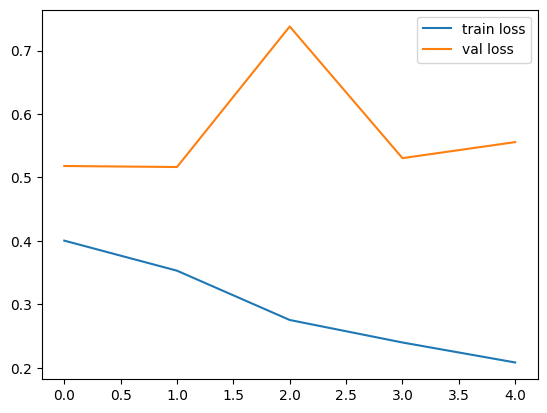

<Figure size 640x480 with 0 Axes>

In [40]:
# loss
plt.plot(op.history['loss'], label='train loss')
plt.plot(op.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

## Accuracy Plot

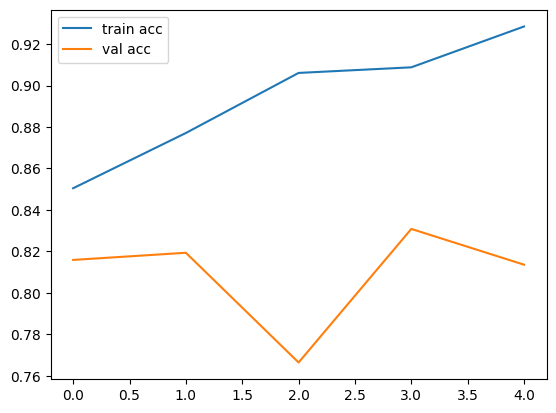

<Figure size 640x480 with 0 Axes>

In [42]:
# accuracies
plt.plot(op.history['accuracy'], label='train acc')
plt.plot(op.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


## saving the model

In [43]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')